In [1]:
import os, sys; sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

import util.RAVDESS_dataset_util as Rd
import multimodal_vae
from train_mvae import build_model, train

from config_args import ConfigModelArgs, ConfigTrainArgs

In [3]:
cfg_model = ConfigModelArgs()
cfg_train = ConfigTrainArgs()

In [4]:
face_dataset = Rd.FaceEmotionDataset(
    root_dir=cfg_model.dataset_path,
    transform=transforms.Compose
    ([
        Rd.Rescale(cfg_model.img_size), 
        Rd.CenterCrop(cfg_model.img_size), 
        Rd.ToTensor()
    ]))

trainingset_len = len(face_dataset) // 100 * 95
testset_len = len(face_dataset) - trainingset_len
training_dataset, testing_dataset = torch.utils.data.random_split(
    face_dataset, 
    [trainingset_len, testset_len],
    #generator=torch.Generator().manual_seed(42)
)

dataset_loader = DataLoader(training_dataset, batch_size=cfg_train.batch_size,
                        shuffle=True, num_workers=cfg_train.num_workers)

testset_loader = DataLoader(testing_dataset, batch_size=cfg_train.batch_size,
                        shuffle=True, num_workers=cfg_train.num_workers)

print('training set size: ',trainingset_len,'\ntest set size: ',testset_len)

training set size:  9310 
test set size:  557


In [5]:
model: torch.nn.Module = build_model(
    cat_dim=cfg_model.cat_dim,
    latent_space_dim=cfg_model.z_dim,
    hidden_dim=cfg_model.hidden_dim,
    num_channels=cfg_model.channel_dim,
    loss_weights=cfg_model.loss_weights,
    expert_type=cfg_model.expert_type,
    use_cuda=True
).double()

In [6]:
training_losses = train(
    mvae_model=model,
    dataset_loader=dataset_loader,
    learning_rate=cfg_train.learning_rate,
    optim_betas=cfg_train.optim_betas,
    num_epochs=cfg_train.num_epochs,
    batch_size=cfg_train.batch_size,
    checkpoint_every=cfg_train.checkpoint_every,
    checkpoint_path=cfg_train.checkpoint_path,
    save_model=cfg_train.save_model,
    seed=cfg_train.seed,
    use_cuda=cfg_train.use_cuda,
    cfg=cfg_train
)

 10%|██▊                         | 1/10 [03:45<33:49, 225.51s/it]

Multimodal losses:
Mean total loss: 0.88938;
Mean reconstruction loss: 0.8527;
Mean kld_loss loss: 3667.8;
Mean faces_reconstruction loss: 0.18769;
Mean emotions_reconstruction loss: 0.665;

Face losses:
Mean total loss: 0.20868;
Mean reconstruction loss: 0.17909;
Mean kld_loss loss: 2958.8;
Mean faces_reconstruction loss: 0.17909;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.71864;
Mean reconstruction loss: 0.70547;
Mean kld_loss loss: 1317.5;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.70547;



 20%|█████▌                      | 2/10 [07:46<31:17, 234.71s/it]

Multimodal losses:
Mean total loss: 0.086283;
Mean reconstruction loss: 0.06934;
Mean kld_loss loss: 1694.3;
Mean faces_reconstruction loss: 0.051572;
Mean emotions_reconstruction loss: 0.017768;

Face losses:
Mean total loss: 0.059142;
Mean reconstruction loss: 0.051586;
Mean kld_loss loss: 755.65;
Mean faces_reconstruction loss: 0.051586;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.032207;
Mean reconstruction loss: 0.019144;
Mean kld_loss loss: 1306.3;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 0.019144;



 30%|████████▍                   | 3/10 [11:47<27:42, 237.53s/it]

Multimodal losses:
Mean total loss: 0.046489;
Mean reconstruction loss: 0.040909;
Mean kld_loss loss: 557.92;
Mean faces_reconstruction loss: 0.040566;
Mean emotions_reconstruction loss: 0.00034385;

Face losses:
Mean total loss: 0.043502;
Mean reconstruction loss: 0.039371;
Mean kld_loss loss: 413.12;
Mean faces_reconstruction loss: 0.039371;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.0031041;
Mean reconstruction loss: 2.1399e-05;
Mean kld_loss loss: 308.27;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 2.1399e-05;



 40%|███████████▏                | 4/10 [15:46<23:47, 237.99s/it]

Multimodal losses:
Mean total loss: 0.039168;
Mean reconstruction loss: 0.035035;
Mean kld_loss loss: 413.31;
Mean faces_reconstruction loss: 0.03486;
Mean emotions_reconstruction loss: 0.00017507;

Face losses:
Mean total loss: 0.037359;
Mean reconstruction loss: 0.033241;
Mean kld_loss loss: 411.77;
Mean faces_reconstruction loss: 0.033241;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.0011421;
Mean reconstruction loss: 8.816e-06;
Mean kld_loss loss: 113.33;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 8.816e-06;



 50%|██████████████              | 5/10 [19:47<19:56, 239.21s/it]

Multimodal losses:
Mean total loss: 0.034617;
Mean reconstruction loss: 0.030643;
Mean kld_loss loss: 397.41;
Mean faces_reconstruction loss: 0.030498;
Mean emotions_reconstruction loss: 0.00014426;

Face losses:
Mean total loss: 0.03303;
Mean reconstruction loss: 0.028953;
Mean kld_loss loss: 407.7;
Mean faces_reconstruction loss: 0.028953;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.00091659;
Mean reconstruction loss: 7.1669e-06;
Mean kld_loss loss: 90.942;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 7.1669e-06;



 60%|████████████████▊           | 6/10 [23:48<15:59, 239.82s/it]

Multimodal losses:
Mean total loss: 0.031625;
Mean reconstruction loss: 0.027723;
Mean kld_loss loss: 390.14;
Mean faces_reconstruction loss: 0.027607;
Mean emotions_reconstruction loss: 0.00011636;

Face losses:
Mean total loss: 0.030209;
Mean reconstruction loss: 0.026143;
Mean kld_loss loss: 406.6;
Mean faces_reconstruction loss: 0.026143;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.00081176;
Mean reconstruction loss: 5.2955e-06;
Mean kld_loss loss: 80.647;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 5.2955e-06;



 70%|███████████████████▌        | 7/10 [27:47<11:58, 239.66s/it]

Multimodal losses:
Mean total loss: 0.029121;
Mean reconstruction loss: 0.025282;
Mean kld_loss loss: 383.94;
Mean faces_reconstruction loss: 0.025172;
Mean emotions_reconstruction loss: 0.0001099;

Face losses:
Mean total loss: 0.0278;
Mean reconstruction loss: 0.023775;
Mean kld_loss loss: 402.5;
Mean faces_reconstruction loss: 0.023775;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.00074019;
Mean reconstruction loss: 4.8999e-06;
Mean kld_loss loss: 73.529;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 4.8999e-06;



 80%|██████████████████████▍     | 8/10 [31:46<07:58, 239.39s/it]

Multimodal losses:
Mean total loss: 0.027259;
Mean reconstruction loss: 0.023465;
Mean kld_loss loss: 379.39;
Mean faces_reconstruction loss: 0.023375;
Mean emotions_reconstruction loss: 9.0598e-05;

Face losses:
Mean total loss: 0.02596;
Mean reconstruction loss: 0.021969;
Mean kld_loss loss: 399.11;
Mean faces_reconstruction loss: 0.021969;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.00069243;
Mean reconstruction loss: 8.9364e-06;
Mean kld_loss loss: 68.349;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 8.9364e-06;



 90%|█████████████████████████▏  | 9/10 [35:46<03:59, 239.46s/it]

Multimodal losses:
Mean total loss: 0.025692;
Mean reconstruction loss: 0.021925;
Mean kld_loss loss: 376.68;
Mean faces_reconstruction loss: 0.021826;
Mean emotions_reconstruction loss: 9.9941e-05;

Face losses:
Mean total loss: 0.024518;
Mean reconstruction loss: 0.02057;
Mean kld_loss loss: 394.84;
Mean faces_reconstruction loss: 0.02057;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.0006601;
Mean reconstruction loss: 4.0189e-06;
Mean kld_loss loss: 65.608;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 4.0189e-06;



100%|███████████████████████████| 10/10 [39:46<00:00, 238.67s/it]

Multimodal losses:
Mean total loss: 0.024579;
Mean reconstruction loss: 0.020848;
Mean kld_loss loss: 373.04;
Mean faces_reconstruction loss: 0.020768;
Mean emotions_reconstruction loss: 8.0313e-05;

Face losses:
Mean total loss: 0.023398;
Mean reconstruction loss: 0.019467;
Mean kld_loss loss: 393.05;
Mean faces_reconstruction loss: 0.019467;
Mean emotions_reconstruction loss: 0.0;

Emotion losses:
Mean total loss: 0.00062623;
Mean reconstruction loss: 4.1573e-06;
Mean kld_loss loss: 62.207;
Mean faces_reconstruction loss: 0.0;
Mean emotions_reconstruction loss: 4.1573e-06;



In [7]:
skip_epoch_plot=1

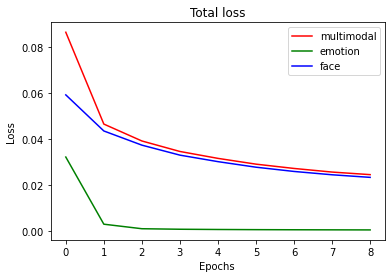

In [8]:
plt.title("Total loss")
plt.ylabel("Loss ")
plt.xlabel("Epochs ")
plt.plot(training_losses['multimodal_loss'].total_loss[skip_epoch_plot:], color='red', label='multimodal')
plt.plot(training_losses['emotion_loss'].total_loss[skip_epoch_plot:], color='green', label='emotion')
plt.plot(training_losses['face_loss'].total_loss[skip_epoch_plot:], color='blue', label='face')
plt.legend(loc="upper right")

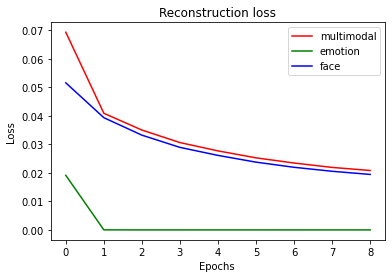

In [9]:
plt.title("Reconstruction loss")
plt.ylabel("Loss ")
plt.xlabel("Epochs ")
plt.plot(training_losses['multimodal_loss'].reconstruction_loss[skip_epoch_plot:], color='red', label='multimodal')
plt.plot(training_losses['emotion_loss'].reconstruction_loss[skip_epoch_plot:], color='green', label='emotion')
plt.plot(training_losses['face_loss'].reconstruction_loss[skip_epoch_plot:], color='blue', label='face')
plt.legend(loc="upper right")

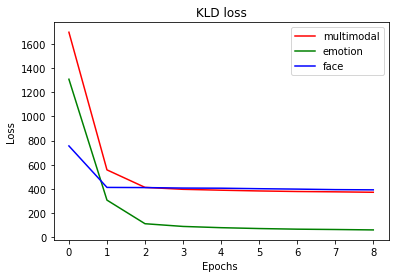

In [10]:
plt.title("KLD loss")
plt.ylabel("Loss ")
plt.xlabel("Epochs ")
plt.plot(training_losses['multimodal_loss'].kld_loss[skip_epoch_plot:], color='red', label='multimodal')
plt.plot(training_losses['emotion_loss'].kld_loss[skip_epoch_plot:], color='green', label='emotion')
plt.plot(training_losses['face_loss'].kld_loss[skip_epoch_plot:], color='blue', label='face')
plt.legend(loc="upper right")

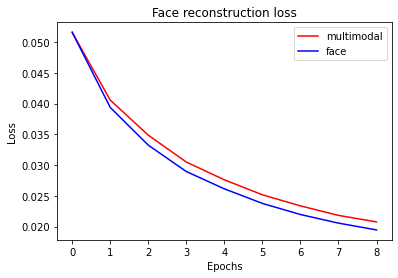

In [11]:
plt.title("Face reconstruction loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.plot(training_losses['multimodal_loss'].faces_reconstruction_loss[skip_epoch_plot:], color='red', label='multimodal')
#plt.plot(training_losses['emotion_loss'].faces_reconstruction_loss[skip_epoch_plot:], color='green', label='emotion')
plt.plot(training_losses['face_loss'].faces_reconstruction_loss[skip_epoch_plot:], color='blue', label='face')
plt.legend(loc="upper right")

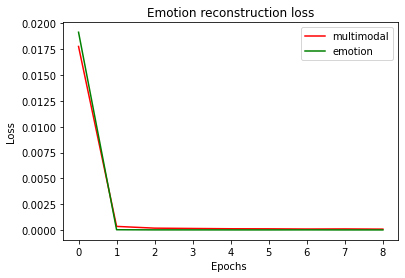

In [12]:
plt.title("Emotion reconstruction loss")
plt.ylabel("Loss ")
plt.xlabel("Epochs ")
plt.plot(training_losses['multimodal_loss'].emotions_reconstruction_loss[skip_epoch_plot:], color='red', label='multimodal')
plt.plot(training_losses['emotion_loss'].emotions_reconstruction_loss[skip_epoch_plot:], color='green', label='emotion')
#plt.plot(training_losses['face_loss'].emotions_reconstruction_loss[skip_epoch_plot:], color='blue', label='face')
plt.legend(loc="upper right")

In [13]:
def testBatch(model, dataset_loader, img_size=64, use_cuda=True):
    model.train()
    plt.figure(figsize = (40,10))
    
    sample = next(iter(dataset_loader))
    images = sample['image']
    labels = sample['cat']
    
    if use_cuda:
        images = images.cuda()
        labels = labels.cuda()
        
    batch_size = images.shape[0]
        
    input_array = np.zeros(shape=(img_size, 1, 3), dtype="uint8")
    reconstructed_array = np.zeros(shape=(img_size, 1, 3), dtype="uint8")
    reconstructed_emotions = []
    
    reconstructed_images, reconstructed_emotions, _, _ = model(faces=None, emotions=labels)

    for idx in range(4):
        input_image = images[idx]
        
        # storing the input image
        input_image_display = np.array(input_image.cpu()*255., dtype='uint8').transpose((1, 2, 0))
        input_array = np.concatenate((input_array, input_image_display), axis=1)
        
        # generating the reconstructed image and adding to array
        input_image = input_image.view(1, 3, img_size, img_size)
        
        reconstructed_img = reconstructed_images[idx].cpu().view(3, img_size, img_size).detach().numpy()
        reconstructed_img = np.array(reconstructed_img*255., dtype='uint8').transpose((1, 2, 0))
        reconstructed_array = np.concatenate((reconstructed_array, reconstructed_img), axis=1)
        
        
    input_array = input_array[:,1:,:]
    reconstructed_array = reconstructed_array[:,1:,:]
    display_array = np.concatenate((input_array, reconstructed_array), axis=0)
    plt.imshow(display_array)
    
    print([Rd.emocat[label.item()] for label in labels[:4]])
    print([Rd.emocat[emo.item()] for emo in torch.argmax(reconstructed_emotions, 1)[:4]])

['sad', 'calm', 'calm', 'fearful']
['sad', 'calm', 'calm', 'fearful']


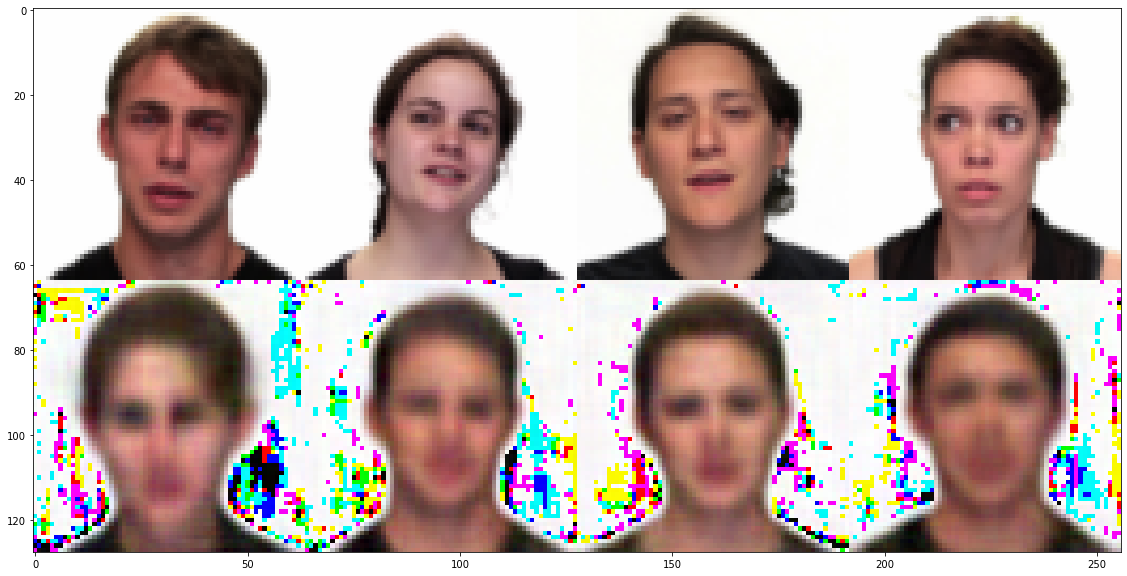

In [14]:
testBatch(model, testset_loader)

In [15]:
from tqdm import tqdm
def emotion_accuracy(model, dataset_loader):
    
    match = 0
    total = 0
    
    for sample in tqdm(iter(dataset_loader)):
        labels = sample['cat'].cuda()
                            
        _, reconstructed_emotions, _, _ = model(faces=None, emotions=labels)  
        emotion_cat = torch.argmax(reconstructed_emotions, 1)  
        
        for idx in range(len(labels)):
            total += 1
            if labels[idx] == emotion_cat[idx]:
                match += 1
    
    acc = match / total
    return acc

In [16]:
print(emotion_accuracy(model, testset_loader))

100%|████████████████████████████| 18/18 [00:06<00:00,  2.67it/s]

1.0


In [17]:
save_model = False

if save_model:
    # Do a global and a local save of the model (local to Hydra outputs)
    torch.save(mvae_model.state_dict(), cfg.model_save_path)
    torch.save(mvae_model.state_dict(), "ravdess_mvae_pretrained.pt")
    logger.info(f"Saved model to '{cfg.train.plain.model_save_path}', and also locally.")

    # Do a global and local save of the training stats (local to Hydra outputs)
    torch.save(training_losses, cfg.stats_save_path)
    torch.save(training_losses, "ravdess_mvae_pretrained_stats.pt")
    logger.info(f"Saved model to '{cfg.train.plain.stats_save_path}', and also locally.")